In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [4]:
my_data_dir = 'C:\\Users\\aaa\\Desktop\\cell_images\\cell_images'

In [5]:
os.listdir(my_data_dir) 

['test', 'train']

In [6]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [7]:
test_path

'C:\\Users\\aaa\\Desktop\\cell_images\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
 os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

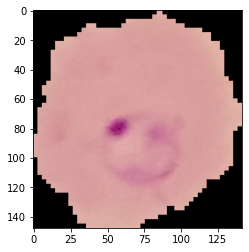

In [16]:
plt.imshow(imread(para_cell))

In [17]:

un_cell = train_path + 'uninfected\\'+ os.listdir(train_path+'uninfected')[0]

In [19]:
un_cell

'C:\\Users\\aaa\\Desktop\\cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

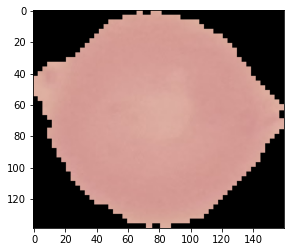

In [20]:
plt.imshow(imread(un_cell))

In [21]:
pwd

'C:\\Users\\aaa\\Desktop\\RL\\04-CNNs'

In [22]:
len(os.listdir(train_path+'parasitized'))

12480

In [23]:
len(os.listdir(train_path+'uninfected'))

12480

In [24]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

C:\Users\aaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


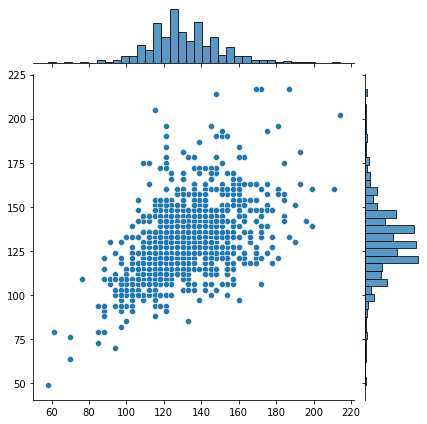

In [26]:
sns.jointplot(dim1,dim2)

In [27]:
np.mean(dim1)

130.92538461538462

In [28]:
np.mean(dim2)

130.75

In [29]:
image_shape = (130,130,3)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [34]:
uninfected_cell = plt.imread(un_cell)

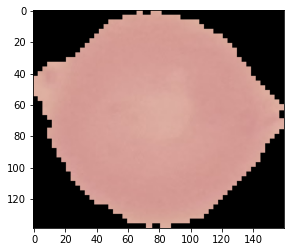

In [35]:
plt.imshow(uninfected_cell)

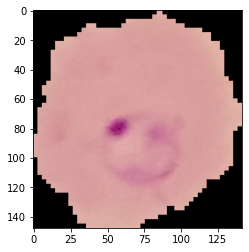

In [38]:
para_img = imread(para_cell)
plt.imshow(para_img)

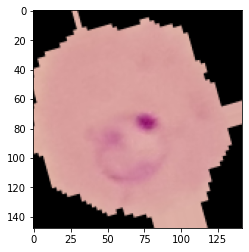

In [43]:
plt.imshow(image_gen.random_transform(para_img))

In [44]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [45]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [46]:
from tensorflow.keras.models import Sequential

In [54]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,MaxPooling2D,Activation

In [50]:
model = Sequential()
model.add(Conv2D(filters=32,kernal_size=(3,3),input_shape=image_shape,activation='relu')
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernal_size=(3,3),input_shape=image_shape,activation='relu')
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64,kernal_size=(3,3),input_shape=image_shape,activation='relu')
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Flatten()) 
          
model.add(Dense(128,activation='relu')) 
          
model.add(Dropout(0.5))
          
model.add(Dense(1,activation='sigmoid'))  

          
model.compile(loss='binary_crossentropy',optimizer='adam',matrics=['accuracy'])          

SyntaxError: invalid syntax (<ipython-input-50-12f2492ebd58>, line 3)

In [55]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [59]:
batch_size=16

In [60]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [61]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [62]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [64]:
results = model.fit_generator(train_image_gen,epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
  12/1560 [..............................] - ETA: 11:42 - loss: 15.4463 - accuracy: 0.4792

KeyboardInterrupt: 

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model1 = load_model('malaria_detector.h5')

In [68]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [70]:
model1.evaluate_generator(test_image_gen)

[35.77450224486574, 0.8738462]

In [71]:
model.metrics_names

['loss', 'accuracy']

In [72]:
pred = model.predict_generator(test_image_gen)

In [73]:
pred

array([[0.35227394],
       [0.98860663],
       [0.74760604],
       ...,
       [0.9973774 ],
       [0.9973273 ],
       [0.98053175]], dtype=float32)

In [74]:
predictions = pred > 0.5

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.60      0.03      0.05      1300
           1       0.50      0.98      0.66      1300

    accuracy                           0.50      2600
   macro avg       0.55      0.50      0.36      2600
weighted avg       0.55      0.50      0.36      2600



In [78]:
model11 = load_model('malaria_detector.h5')

In [79]:
model11.evaluate_generator(test_image_gen)

[35.52690477897788, 0.8696154]